In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# CARGAMOS EL DATASET Y HECHAMOS LOS PRIMEROS VISTAZOS A LOS TIPOS DE DATOS Y DEMAS

In [2]:
victimas = pd.read_excel("homicidios.xlsx", sheet_name=2)
victimas.head()

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03 00:00:00
3,2016-0004,2016-01-10,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18,SD
4,2016-0005,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01 00:00:00


In [3]:
victimas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID_hecho             717 non-null    object        
 1   FECHA                717 non-null    datetime64[ns]
 2   AAAA                 717 non-null    int64         
 3   MM                   717 non-null    int64         
 4   DD                   717 non-null    int64         
 5   ROL                  717 non-null    object        
 6   VICTIMA              717 non-null    object        
 7   SEXO                 717 non-null    object        
 8   EDAD                 717 non-null    object        
 9   FECHA_FALLECIMIENTO  717 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 56.1+ KB


# ANALIZAMOS LOS NULOS

In [4]:
victimas.isnull().sum()

ID_hecho               0
FECHA                  0
AAAA                   0
MM                     0
DD                     0
ROL                    0
VICTIMA                0
SEXO                   0
EDAD                   0
FECHA_FALLECIMIENTO    0
dtype: int64

In [5]:
victimas.replace("SD", np.nan, inplace=True)
victimas.isnull().sum()

ID_hecho                0
FECHA                   0
AAAA                    0
MM                      0
DD                      0
ROL                    11
VICTIMA                 9
SEXO                    6
EDAD                   53
FECHA_FALLECIMIENTO    68
dtype: int64

# AÑOS EN LOS QUE ESTAN DOCUMENTADOS LOS ACCIDENTES

In [6]:
victimas["AAAA"].unique()

array([2016, 2017, 2018, 2019, 2020, 2021], dtype=int64)

# VERIFICO DUPLICADOS

In [7]:
victimas[victimas.duplicated()]

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO


# ANALISIS DE EDADES

In [8]:
victimas["EDAD"].value_counts()

30.0    28
29.0    24
23.0    24
28.0    20
27.0    20
        ..
11.0     1
13.0     1
85.0     1
7.0      1
88.0     1
Name: EDAD, Length: 85, dtype: int64

# ELIMINO COLUMNAS INNCESARIAS

In [9]:
victimas.drop(["ID_hecho", "AAAA", "MM", "DD", "FECHA_FALLECIMIENTO"], axis=1, inplace = True)

# DISTRIBUCION DE VICTIMAS POR GENERO

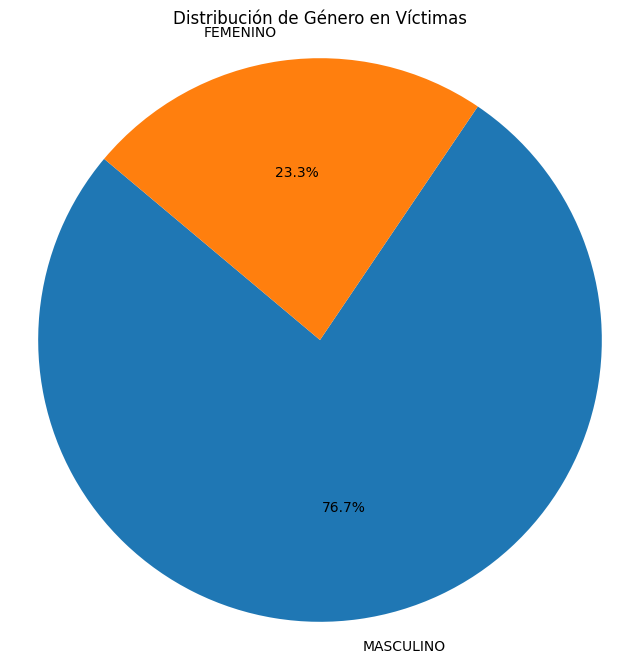

In [10]:
# Obtener la distribución de género
distribucion_sexo = victimas["SEXO"].value_counts()

# Crear un gráfico circular (pie chart)
plt.figure(figsize=(8, 8))
plt.pie(distribucion_sexo.values, labels=distribucion_sexo.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Para asegurarse de que el gráfico sea un círculo
plt.title('Distribución de Género en Víctimas')
plt.show()

# COINCIDE CON DATOS OFICIALES
![Alt text](image-2.png)

# IMPUTACION DE VALORES FALTANTES EN EDADES

In [11]:
edades = victimas[~victimas["EDAD"].isna()]["EDAD"]
edades = edades.astype(float)
edades

0      19.0
1      70.0
2      30.0
3      18.0
4      29.0
       ... 
712    50.0
713    18.0
714    43.0
715    27.0
716    60.0
Name: EDAD, Length: 664, dtype: float64

In [12]:
from sklearn.impute import KNNImputer
media_edades = edades.mean()
knn_imputer = KNNImputer(n_neighbors=5)
victimas["EDAD"] = pd.to_numeric(victimas["EDAD"], errors="coerce")
victimas["EDAD"] = knn_imputer.fit_transform(victimas[["EDAD"]])

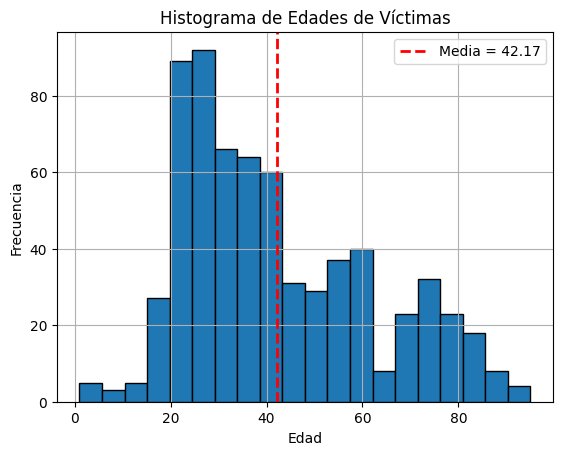

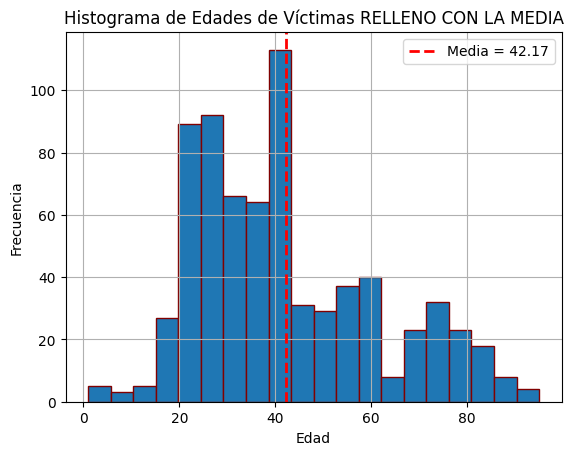

In [13]:
plt.hist(edades, bins=20, edgecolor='k')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Histograma de Edades de Víctimas')
plt.axvline(media_edades, color='red', linestyle='dashed', linewidth=2, label=f'Media = {media_edades:.2f}')
plt.grid(True)
plt.legend()
plt.show()

plt.hist(victimas["EDAD"], bins=20, edgecolor='maroon')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Histograma de Edades de Víctimas RELLENO CON LA MEDIA')
plt.axvline(victimas["EDAD"].mean(), color='red', linestyle='dashed', linewidth=2, label=f'Media = {media_edades:.2f}')
plt.grid(True)
plt.legend()
plt.show()

# VERIFICAR OUTLIERS EN EDADES

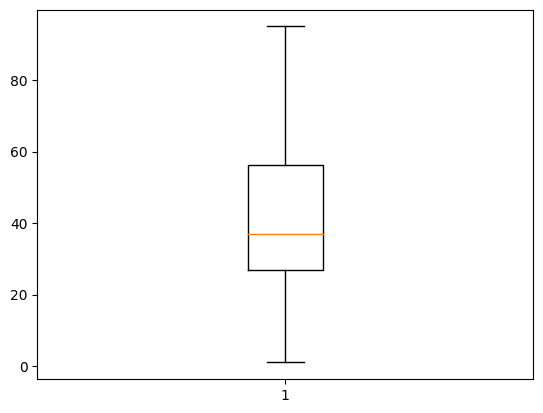

In [14]:
plt.boxplot(edades)
plt.show()

# VICTIMAS POR AÑO

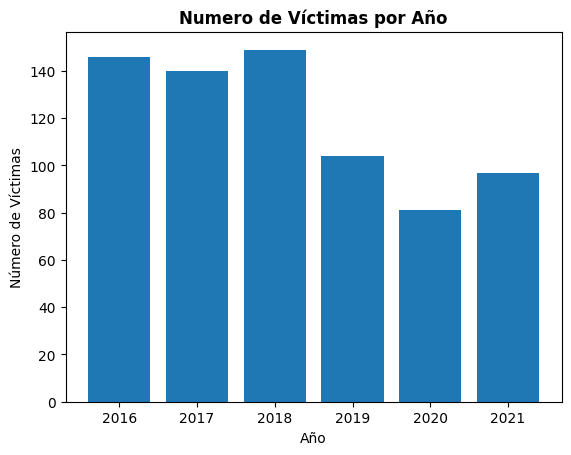

In [15]:
victimas_por_anio = victimas.groupby(victimas["FECHA"].dt.year)["FECHA"].count()

plt.bar(victimas_por_anio.index, victimas_por_anio.values)
plt.xlabel('Año')
plt.ylabel('Número de Víctimas')
plt.title('Numero de Víctimas por Año', fontweight="bold")
plt.show()

# TIPO DE VICTIMA

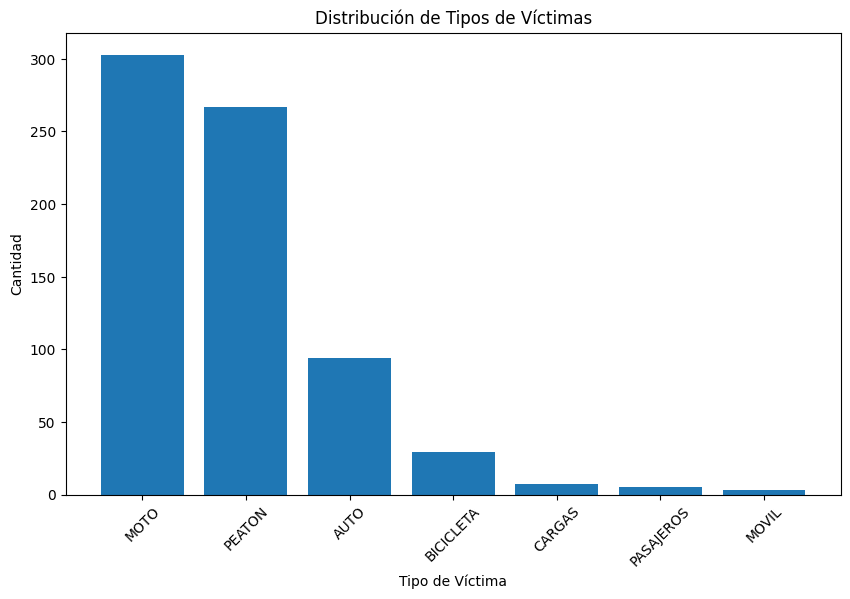

In [16]:
plt.figure(figsize=(10, 6))
plt.bar(list(victimas["VICTIMA"].value_counts().index), list(victimas["VICTIMA"].value_counts().values))
plt.xlabel('Tipo de Víctima')
plt.ylabel('Cantidad')
plt.title('Distribución de Tipos de Víctimas')
plt.xticks(rotation=45) 
plt.show()

# COINCIDENTE CON DATOS OFICIALES
![Alt text](image-3.png)

# EDADES Y TIPOS DE VICTIMAS

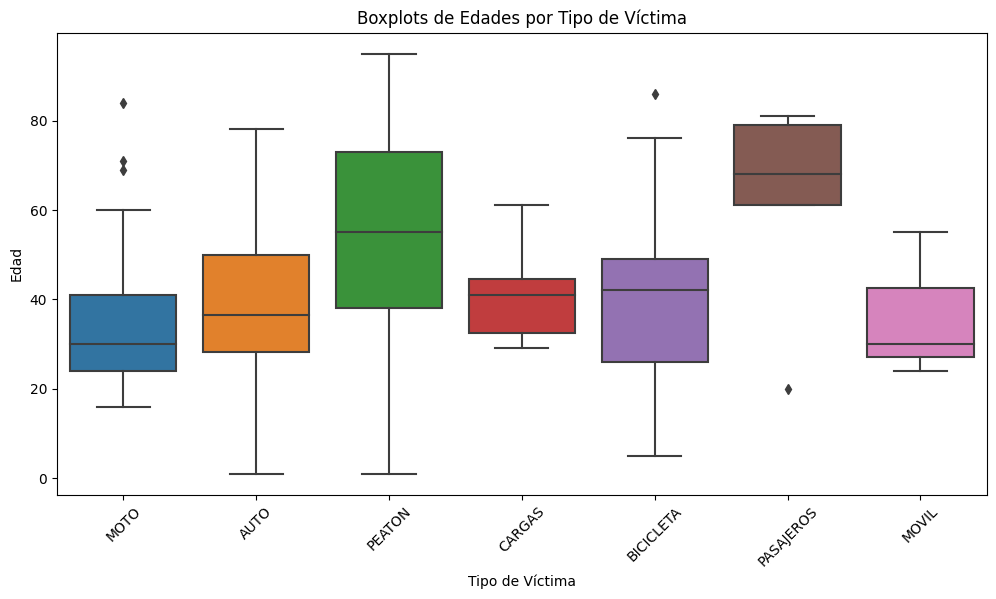

In [17]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="VICTIMA", y="EDAD", data=victimas)
plt.xlabel('Tipo de Víctima')
plt.ylabel('Edad')
plt.title('Boxplots de Edades por Tipo de Víctima')
plt.xticks(rotation=45)

plt.show()

In [18]:
victimas.to_parquet("victimas.parquet")

# MIGRACION DE LOS DATOS A MYSQL

In [19]:
victimas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   FECHA    717 non-null    datetime64[ns]
 1   ROL      706 non-null    object        
 2   VICTIMA  708 non-null    object        
 3   SEXO     711 non-null    object        
 4   EDAD     717 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 28.1+ KB


In [20]:
victimas.dropna(inplace=True)

In [21]:
import mysql.connector

conexion = mysql.connector.connect(
  host="localhost",
  user="root",
  password="root",
  database="siniestros"
)

In [22]:
mycursor = conexion.cursor()
mycursor.execute("DROP TABLE IF EXISTS victimas")
create_table_sql = """
CREATE TABLE victimas (
    FECHA DATE,
    ROL VARCHAR(255),
    VICTIMA VARCHAR(255),
    SEXO VARCHAR(255),
    EDAD FLOAT
)
"""
mycursor.execute(create_table_sql)

In [23]:
cursor = conexion.cursor()
try:
    for index, row in victimas.iterrows():
        insert_query = f"""
        INSERT INTO victimas (FECHA, ROL, VICTIMA, SEXO, EDAD)
        VALUES ('{row['FECHA']}', '{row['ROL']}', '{row['VICTIMA']}', '{row['SEXO']}', {row['EDAD']})
        """
        cursor.execute(insert_query)
    conexion.commit()
except Exception as e:
    print(f"HUBO UN PROBLEMA -> {e}")
finally:
    mycursor.close()
    conexion.close()

